# Exploratory data analysis (EDA) - target label BG2
Regarding BG2, the relationship with ((BG1-targetBG)+DV)/shID was investigated, revealing varying insulin sensitivity across intervals. This formula, which describes the decision made on shID or insulin sensitivity, assesses the ratio of the difference between the pre-meal blood glucose level (BG1) and the target blood glucose level, augmented by the dietary value (DV), divided by the delivered insulin dose (shID). A lower ratio indicates a higher shID required, while a higher ratio suggests a lower insulin dose. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

### Prepare data
####  Read data

In [2]:
# Read the data in csv format
df = pd.read_csv('/Users/polzovatel/Desktop/Python/Portfolio/Diabetes_3/1_2_Preprocessing/FullData_preprocessed.csv')
df

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
0,2022-12-09 07:00:00,B-L,1.756,4.7,4.7,3.0,3.5,1820,-16,74
1,2022-12-09 18:00:00,D-B,3.442,4.3,6.5,2.0,4.0,18,-12,69
2,2022-12-10 07:00:00,B-L,1.584,6.5,5.6,3.0,4.0,2607,-13,77
3,2022-12-10 12:00:00,L-D,2.562,5.6,6.2,2.5,2.0,2067,-12,66
4,2022-12-10 18:00:00,D-B,4.190,6.2,6.1,2.0,3.5,487,-12,66
...,...,...,...,...,...,...,...,...,...,...
198,2023-02-24 12:00:00,L-D,2.194,6.5,6.2,3.0,3.0,1715,-10,66
199,2023-02-24 18:00:00,D-B,2.389,6.2,5.1,3.0,2.5,0,-9,66
200,2023-02-25 07:00:00,B-L,1.706,5.1,6.7,3.0,3.0,1505,-15,65
201,2023-02-25 12:00:00,L-D,1.952,6.7,3.8,3.0,3.0,68,-11,56


The final preprocessed data frame includes several columns with the following information:

- ['BG2']: Target label
- ['Interval']: Meal time
- ['DV']: Dietary value in bread units
- ['BG1']: Pre-meal blood glucose
- ['bID']: Basal insulin dose delivered before the meal
- ['shID']: Short acting insulin delivery
- ['SC']: Step count during the interval
- ['Temp']: Outside temperature during the interval
- ['Humid']: Outside humidity during the interval

Due to insufficient data for a complete year (only two months available), ['Date'] is excluded from the research.

#### Calculate insulin sensitivity or shID coefficient 

In [20]:
df['shID coefficient'] = ((df['BG1']-4.7)+df['DV'])/df['shID']

#### Create a separate data set per interval

In [21]:
# Partitioning based on the interval
df_BL = df[df['Interval']=='B-L']
df_LD = df[df['Interval']=='L-D']
df_DB = df[df['Interval']=='D-B']

In [22]:
# Assigning names for future referencing in the loops
df_BL.name = 'Interval_breakfast-lunch'
df_LD.name = 'Interval_lunch-dinner'
df_DB.name = 'Interval_dinner-breakfast'

In [23]:
# A list of created sub-dataframes
dfs = [df_BL,df_LD,df_DB]

#### Visualization

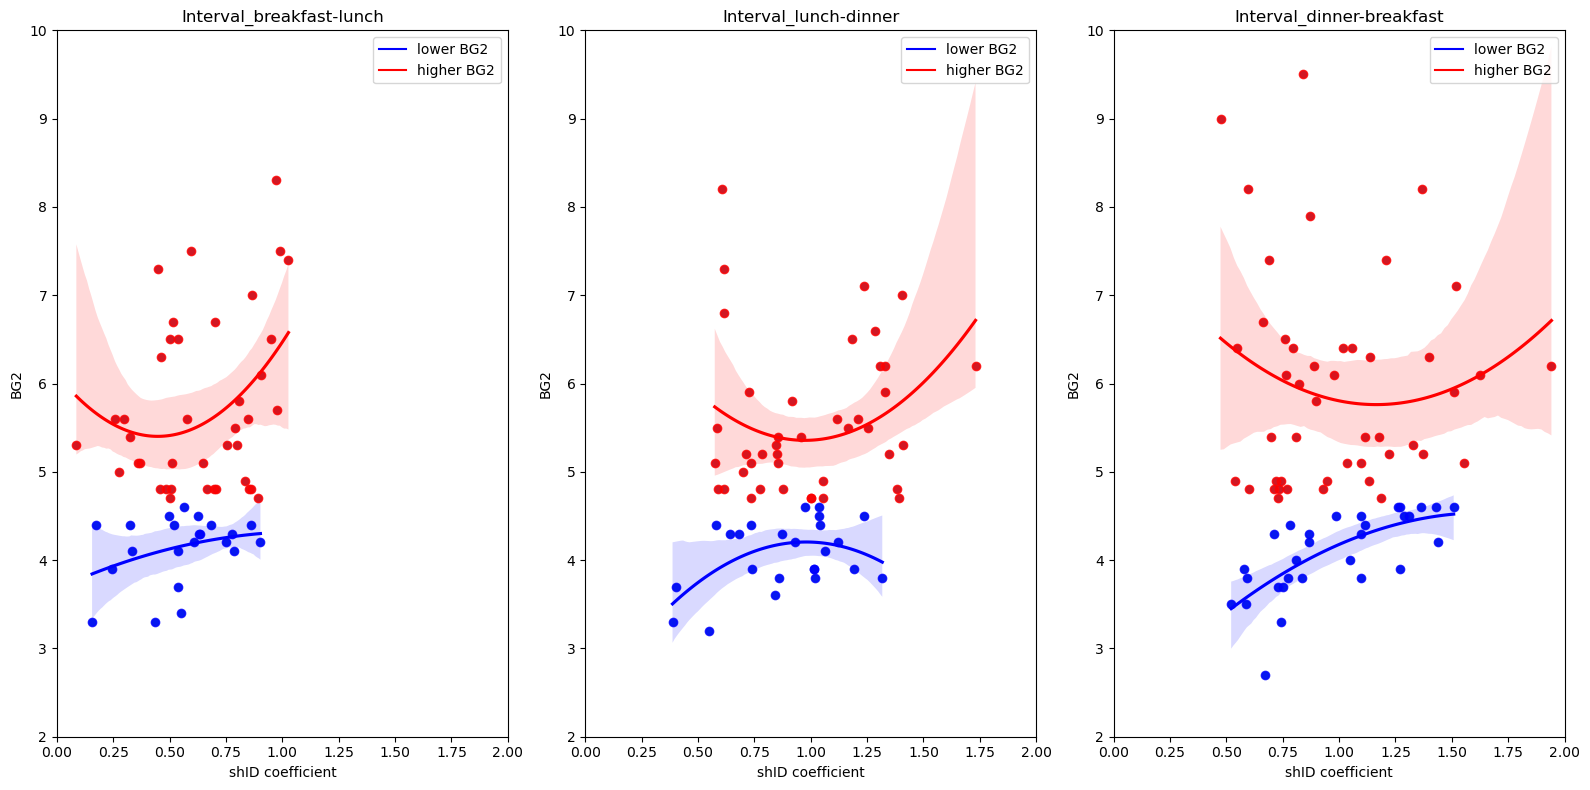

In [32]:
# Create figure and axes
fig,ax = plt.subplots(nrows=1,ncols=len(dfs),figsize=(16,8))

# Iterate through data sets and plot the relationship
for i,d in enumerate(dfs):
    
    # Plot data
    sns.scatterplot(data=d,x='shID coefficient',y='BG2',ax=ax[i])
    sns.regplot(data=d[d['BG2']<4.7],x='shID coefficient',y='BG2',ax=ax[i],color='blue',order=2)
    sns.regplot(data=d[d['BG2']>=4.7],x='shID coefficient',y='BG2',ax=ax[i],color='red',order=2)
    
    # Set title and axis limits
    ax[i].set_title(d.name)
    ax[i].set_ylim(2,10)
    ax[i].set_xlim(0,2)
    
    # Create legend
    blue_line = plt.Line2D([], [], color='blue', label='lower BG2')
    red_line = plt.Line2D([], [], color='red', label='higher BG2')
    ax[i].legend(handles=[blue_line, red_line])

plt.tight_layout();

## Conclusion
This exploration revealed varying insulin sensitivity across intervals, with lower insulin doses required in the evening and higher doses needed in the morning. 